In [1]:
from numpy import *
def loadDataSet(fileName):
    with open(fileName) as f1:
        content = f1.readlines()
        lines = [list(map(float,line.strip("\n").split("\t"))) for line in content]
    return mat(lines)

def pca1(dataMat,topNfeat = 9999):
    meanVal = mean(dataMat,axis=0)
    meanRemoved = dataMat - meanVal
    covMat = cov(meanRemoved,rowvar=0)#协方差矩阵
    eigVals,eigVects = linalg.eig(mat(covMat)) #特征值和特征向量
    eigInd = argsort(eigVals)[::-1][0:topNfeat] #从大到小排序
    redEigVects = eigVects[:,eigInd] #
    lowData = meanRemoved * redEigVects #降维后的数据
    reconMat = (lowData * redEigVects.T) + meanVal #重构后的数据
    return lowData,reconMat
def pca(dataMat,topNfeat=999999):
    meanVals=mean(dataMat,axis=0)
    meanRemoved=dataMat-meanVals
    covMat=cov(meanRemoved,rowvar=0)
    eigVals,eigVects=linalg.eig(mat(covMat))
    eigValInd=argsort(eigVals)
    eigValInd=eigValInd[:-(topNfeat+1):-1]
    redEigVects=eigVects[:,eigValInd]
    lowDDataMat=meanRemoved*redEigVects
    reconMat=(lowDDataMat*redEigVects.T)+meanVals
    return lowDDataMat,reconMat

In [2]:
dataMat=loadDataSet('testSet.txt')
print(dataMat)
lowDMat,reconMat=pca(dataMat,1)
print(shape(lowDMat))

[[10.235186 11.321997]
 [10.122339 11.810993]
 [ 9.190236  8.904943]
 ...
 [ 9.854922  9.201393]
 [ 9.11458   9.134215]
 [10.334899  8.543604]]
(1000, 1)


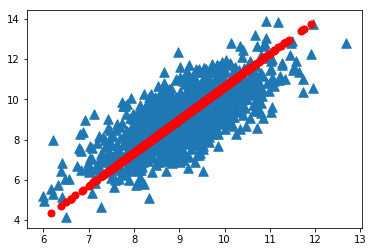

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker="^",s = 90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker="o", s=50,c ="red")
plt.show()

In [4]:
lowDMat,reconMat=pca(dataMat,1)
print(shape(lowDMat))
test=lowDMat.tolist()
print(test[0])
print(shape(reconMat))


(1000, 1)
[-2.510335968263292]
(1000, 2)
